# Generate synthetic data to train on

In [1]:
import skmine

print("This tutorial was tested with the following version of skmine :", skmine.__version__)

This tutorial was tested with the following version of skmine : 0.0.11


In [2]:
%matplotlib inline
from skmine.datasets import make_transactions

In [3]:
D = make_transactions(n_transactions=100, 
                     n_items=10,
                     density=.2)

In [4]:
D.head()

0    [7, 5, 2, 9]
1          [1, 5]
2             [6]
3    [8, 9, 2, 0]
4          [8, 1]
dtype: object

### A simple plot allow us to check the distrution of our transactions lenghts
**Transaction lengths should be centered** around 2 as density has been set to 20% and there are 10 items in total

<Axes: >

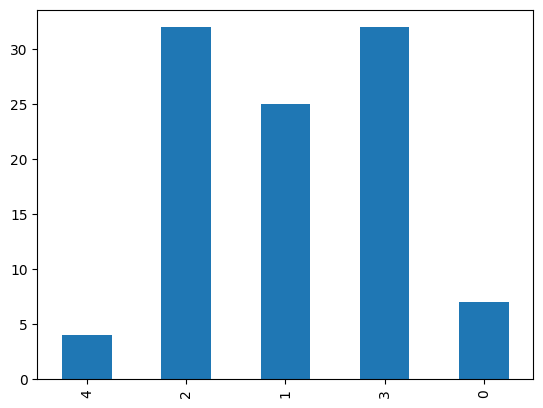

In [5]:
D.map(len).value_counts(sort=False).plot(kind='bar')

In [6]:
from skmine.datasets.utils import describe

In [7]:
describe(D)

{'n_items': 10,
 'avg_transaction_size': 2.01,
 'n_transactions': 100,
 'density': 0.20099999999999998}

------------------
### Now let's generate associated labels, for multiclass classification

In [8]:
from skmine.datasets import make_classification

In [9]:
D, y = make_classification(n_classes=2, densities=[0.2, 0.5], weights=[.6, .4], shuffle=True)

In [10]:
D.groupby(y).apply(describe)

class                      
0      n_items                 100.000000
       avg_transaction_size     20.133333
       n_transactions           60.000000
       density                   0.201333
1      n_items                 100.000000
       avg_transaction_size     49.850000
       n_transactions           40.000000
       density                   0.498500
Name: transaction, dtype: float64

In [11]:
y

1     1
36    0
55    0
32    0
37    0
     ..
32    1
8     0
42    0
31    0
15    1
Name: class, Length: 100, dtype: int64